In [10]:
import pandas as pd
import numpy as np
from pathlib import Path

In [39]:
data_dir = Path("../../data/brain_tumor_dataset")
yes_dir = data_dir / "yes"
no_dir = data_dir / "no"

In [40]:
import torchvision.transforms as transforms

transform = transforms.Compose([
  transforms.Resize((224, 224)),
  transforms.ToTensor(),
  transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [45]:
from torchvision.datasets import ImageFolder

ds = ImageFolder(root=data_dir, transform=transform)

In [46]:
ds

Dataset ImageFolder
    Number of datapoints: 253
    Root location: ..\..\data\brain_tumor_dataset
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [56]:
class_names = ds.classes
class_names

['no', 'yes']

In [51]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Subset

indices = list(range(len(ds)))
train_indices, test_indices = train_test_split(indices, test_size=0.3, random_state=42)
train_ds = Subset(ds, train_indices)
test_ds = Subset(ds, test_indices)

In [52]:
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=32, shuffle=False)

In [53]:
len(train_loader), len(test_loader)

(6, 3)

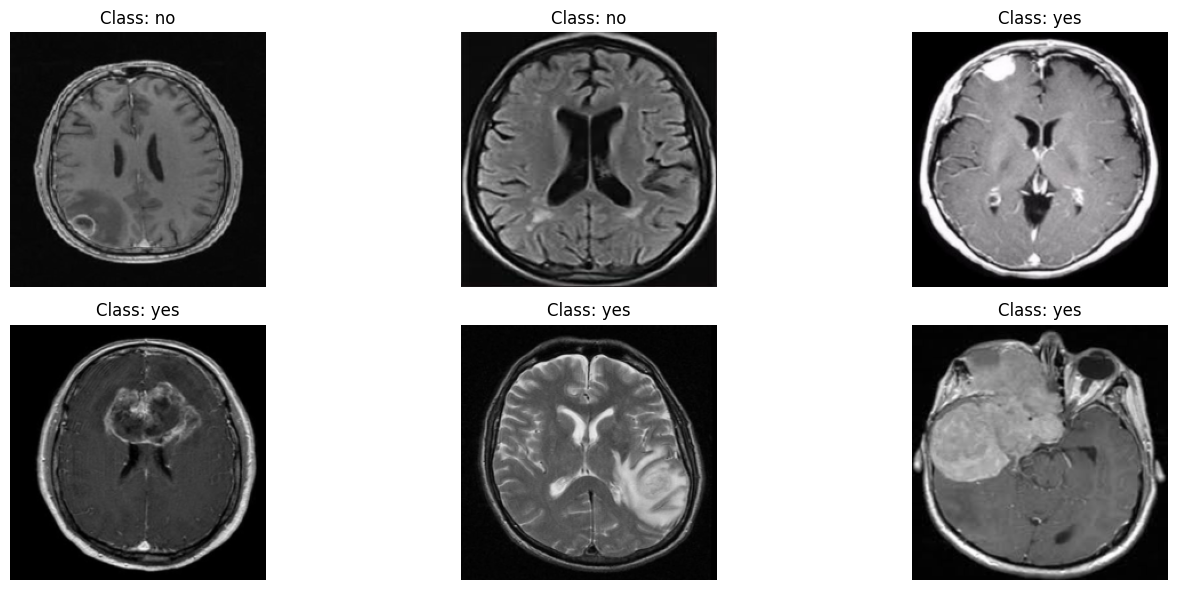

In [57]:
import matplotlib.pyplot as plt

images, labels = next(iter(train_loader))

num_of_images = 6
plt.figure(figsize=(15, 6))
for i in range(num_of_images):
  img = images[i].numpy().transpose((1, 2, 0))
  img = np.clip(img * 0.5 + 0.5, 0, 1)
  plt.subplot(2, int(num_of_images/ 2), i + 1)
  plt.imshow(img)
  if class_names:
      plt.title(f'Class: {class_names[labels[i]]}')
  else:
      plt.title(f'Label: {labels[i].item()}')
  plt.axis('off')
plt.tight_layout()
plt.show()

In [61]:
len(images), len(labels)

(32, 32)

In [63]:
images[0].shape

torch.Size([3, 224, 224])

# modeling

In [62]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'